<a href="https://colab.research.google.com/github/Pabitra-M/DataScience/blob/main/notebooks/ml_models/Model_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('Algerian_forest_fires_cleaned_dataset.csv')

In [3]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [4]:
df.drop(['day', 'month', 'year'],axis=1,inplace=True)

In [5]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [6]:
df['Classes'] = np.where(df['Classes'].str.contains('not fire'), 0, 1)

In [7]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [8]:
## devide our features
X = df.drop('FWI',axis=1)
y = df['FWI']

In [9]:
## Train test Split
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [32]:
X_train.shape

(181, 11)

In [33]:
## Feature Selection base of correlation
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.645380,-0.280833,-0.318872,0.693938,0.489839,0.380165,0.626802,0.464135,0.508626,0.245711
RH,-0.645380,1.000000,0.257184,0.230779,-0.632781,-0.410525,-0.241673,-0.701228,-0.360481,-0.433839,-0.370604
Ws,-0.280833,0.257184,1.000000,0.230003,-0.161391,0.004794,0.107368,-0.006268,0.042157,-0.040229,-0.231225
Rain,-0.318872,0.230779,0.230003,1.000000,-0.546540,-0.289536,-0.306431,-0.353492,-0.301455,-0.374078,-0.050991
FFMC,0.693938,-0.632781,-0.161391,-0.546540,1.000000,0.620265,0.533760,0.758535,0.608704,0.784427,0.233159
DMC,0.489839,-0.410525,0.004794,-0.289536,0.620265,1.000000,0.875607,0.690932,0.983599,0.606645,0.199939
DC,0.380165,-0.241673,0.107368,-0.306431,0.533760,0.875607,1.000000,0.545138,0.946348,0.539772,-0.081269
ISI,0.626802,-0.701228,-0.006268,-0.353492,0.758535,0.690932,0.545138,1.000000,0.655919,0.755893,0.281424
BUI,0.464135,-0.360481,0.042157,-0.301455,0.608704,0.983599,0.946348,0.655919,1.000000,0.602444,0.098997
Classes,0.508626,-0.433839,-0.040229,-0.374078,0.784427,0.606645,0.539772,0.755893,0.602444,1.000000,0.173264


<Axes: >

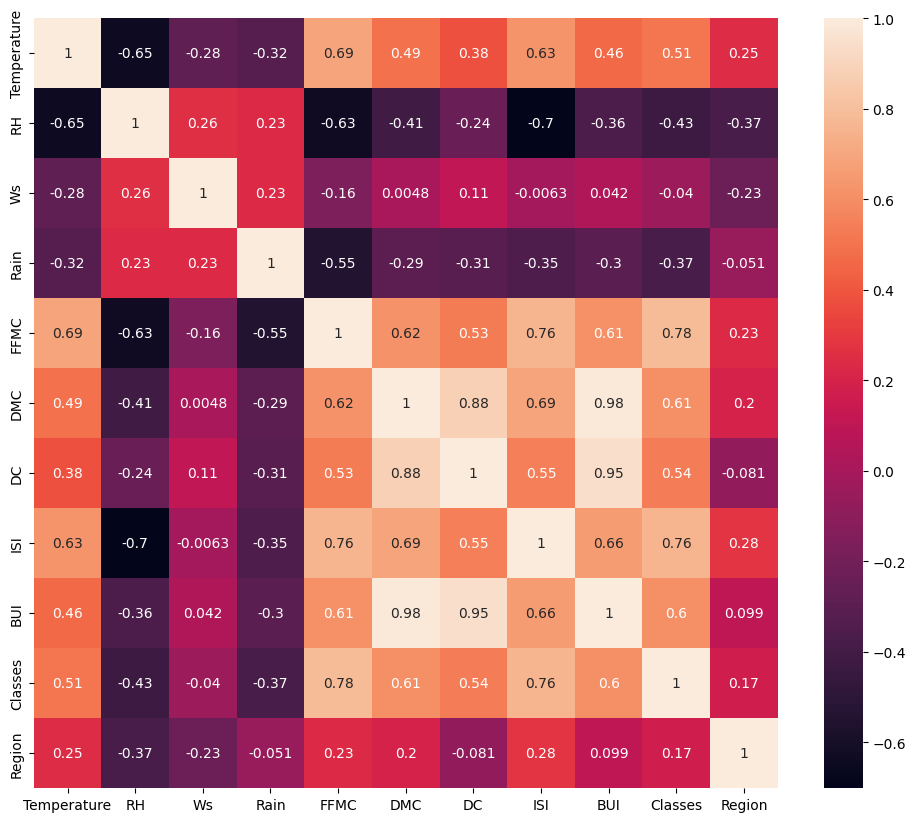

In [34]:
plt.figure(figsize=(12,10))
sns.heatmap(X_train.corr(),annot=True)

In [35]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
          if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
            colname = corr_matrix.columns[i]  # getting the name of column
            col_corr.add(colname)
    return col_corr

In [28]:
corr_feature = correlation(X_train, 0.85)

In [36]:
## drop the feature that have correlation is more then 0.85
X_train.drop(corr_feature,axis=1,inplace=True)
X_test.drop(corr_feature,axis=1,inplace=True)
X_train.shape, X_test.shape

((181, 9), (61, 9))

# Feature Scaling or Standerdization

In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Text(0.5, 1.0, 'After Scaling')

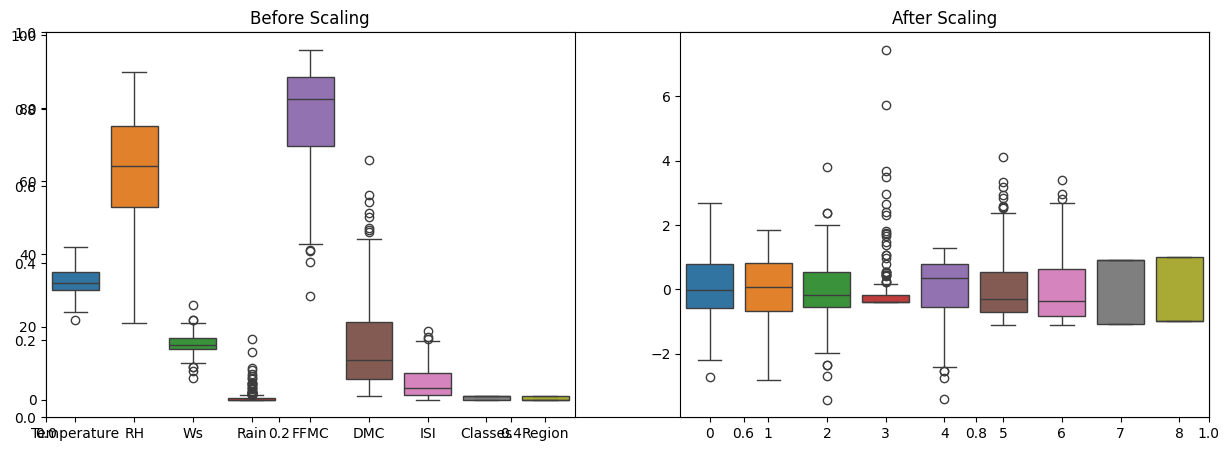

In [38]:
## Boxplot understand Effect of Standerd Scaler
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title('Before Scaling')
plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)
plt.title('After Scaling')

# Linear Regresssion Model

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
linreg = LinearRegression()
linreg.fit(X_train_scaled,y_train)
y_pred = linreg.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Absolute Error: 0.5991845951594338
Mean Squared Error: 0.8241855881688884
Root Mean Squared Error: 0.9078466765753391
R-squared: 0.9834956580309339


Text(0.5, 1.0, 'Actual vs Predicted')

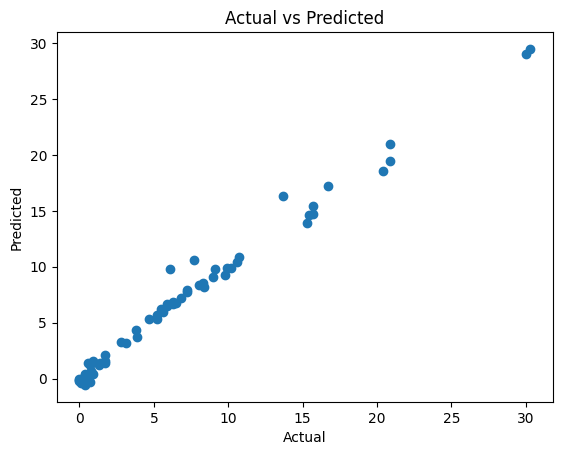

# Lasso Regression

Mean Absolute Error: 1.1519529395933579
Mean Squared Error: 2.4760435008394834
Root Mean Squared Error: 1.5735448836431338
R-squared: 0.9504171520895793


Text(0.5, 1.0, 'Actual vs Predicted')

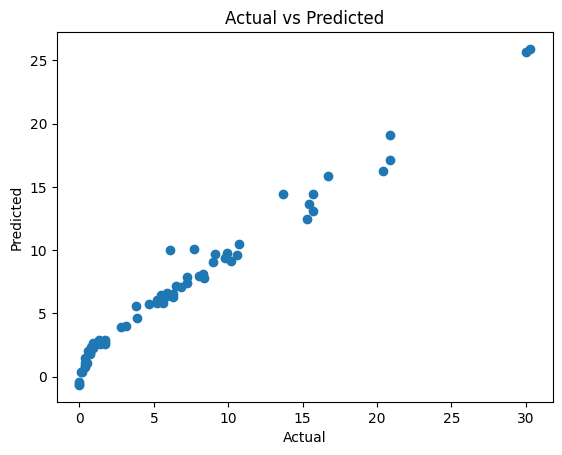

In [41]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
lassoreg = Lasso()
lassoreg.fit(X_train_scaled,y_train)
y_pred = lassoreg.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')

In [46]:
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
lassoregcv = LassoCV(cv=5)
lassoregcv.fit(X_train_scaled,y_train)

LassoCV(cv=5)

In [49]:
lassoregcv.alphas_

array([6.9334327 , 6.46614254, 6.03034617, 5.62392102, 5.24488757,
       4.8913997 , 4.56173573, 4.25429001, 3.9675651 , 3.70016449,
       3.45078579, 3.21821438, 3.0013175 , 2.79903875, 2.6103929 ,
       2.43446116, 2.27038662, 2.11737016, 1.9746665 , 1.84158059,
       1.71746422, 1.60171288, 1.49376279, 1.39308818, 1.2991987 ,
       1.21163705, 1.12997677, 1.05382012, 0.98279617, 0.916559  ,
       0.85478599, 0.79717627, 0.74344926, 0.69334327, 0.64661425,
       0.60303462, 0.5623921 , 0.52448876, 0.48913997, 0.45617357,
       0.425429  , 0.39675651, 0.37001645, 0.34507858, 0.32182144,
       0.30013175, 0.27990387, 0.26103929, 0.24344612, 0.22703866,
       0.21173702, 0.19746665, 0.18415806, 0.17174642, 0.16017129,
       0.14937628, 0.13930882, 0.12991987, 0.12116371, 0.11299768,
       0.10538201, 0.09827962, 0.0916559 , 0.0854786 , 0.07971763,
       0.07434493, 0.06933433, 0.06466143, 0.06030346, 0.05623921,
       0.05244888, 0.048914  , 0.04561736, 0.0425429 , 0.03967

In [50]:
lassoregcv.mse_path_

array([[56.93709459, 53.11277536, 38.98258697, 75.30391649, 57.79772406],
       [51.10760214, 47.78698264, 34.25158083, 71.56490749, 51.60436243],
       [44.85481628, 42.43175741, 29.2163255 , 65.17903423, 46.19957148],
       [39.39977627, 37.671906  , 24.93915682, 59.53686042, 41.48186039],
       [34.63978051, 33.49745944, 21.31436328, 54.5474539 , 36.2625611 ],
       [30.48528874, 29.83425858, 18.25059363, 50.13132646, 31.57808623],
       [26.85832833, 26.61820205, 15.66879996, 46.21897025, 27.51094556],
       [23.69126242, 23.79292477, 13.50057318, 41.57866814, 23.97993823],
       [20.92495653, 21.30942217, 11.68686296, 36.62307409, 20.91549193],
       [18.5080034 , 19.12494494, 10.17660778, 32.29546278, 18.25605462],
       [16.39553754, 17.20203683,  8.92578645, 28.51486911, 15.9484782 ],
       [14.54879023, 15.50847931,  7.89637176, 25.21275175, 13.94656402],
       [12.93369253, 14.01567448,  7.05558353, 22.32696468, 12.21015565],
       [11.52067102, 12.69881078,  6.3

Mean Absolute Error: 0.6860178028426961
Mean Squared Error: 0.9580981012957175
Root Mean Squared Error: 0.978824857313972
R-squared: 0.980814055801644


Text(0.5, 1.0, 'Actual vs Predicted')

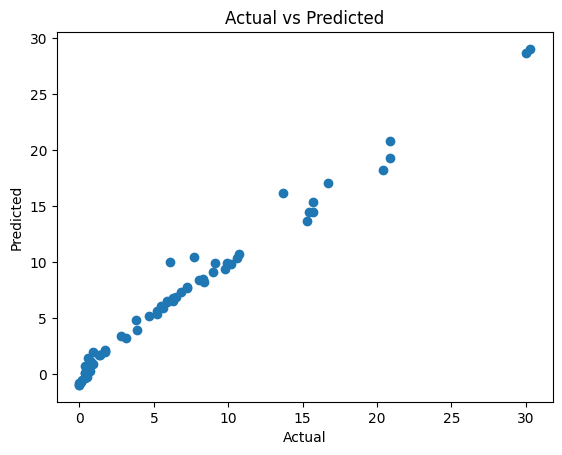

In [53]:
y_pred = lassoregcv.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')

Text(0.5, 1.0, 'Actual vs Predicted')

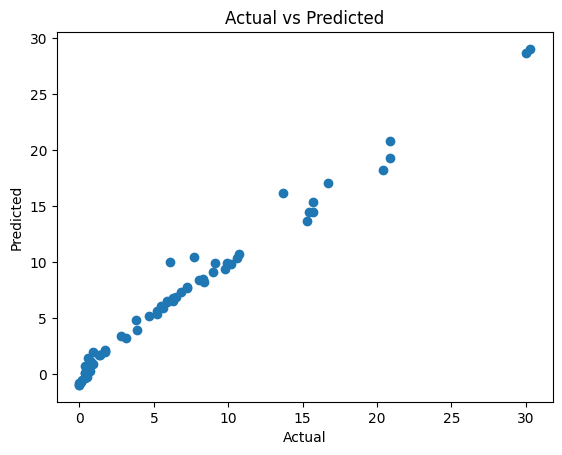

In [52]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')

# Ridge Regression

Mean Absolute Error: 0.6247356096317536
Mean Squared Error: 0.8641107752659822
Root Mean Squared Error: 0.9295755887855394
R-squared: 0.9826961549208475


Text(0.5, 1.0, 'Actual vs Predicted')

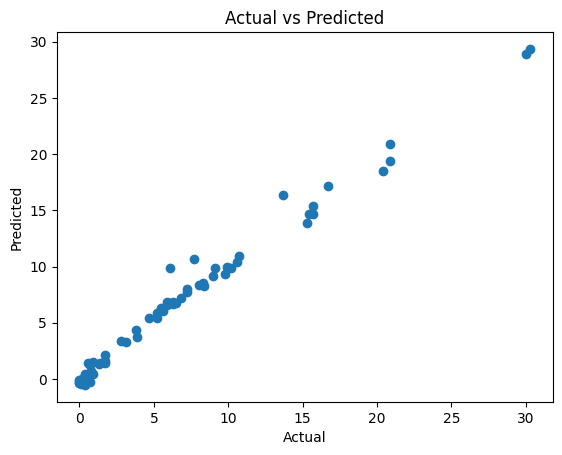

In [42]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
ridgereg = Ridge()
ridgereg.fit(X_train_scaled,y_train)
y_pred = ridgereg.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')

In [54]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
ridgecv = RidgeCV(cv=5)
ridgecv.fit(X_train_scaled,y_train)

RidgeCV(cv=5)

Mean Absolute Error: 0.8700135749249904
Mean Squared Error: 1.3536323043808185
Root Mean Squared Error: 1.163457048790723
R-squared: 0.9728934711155152


Text(0.5, 1.0, 'Actual vs Predicted')

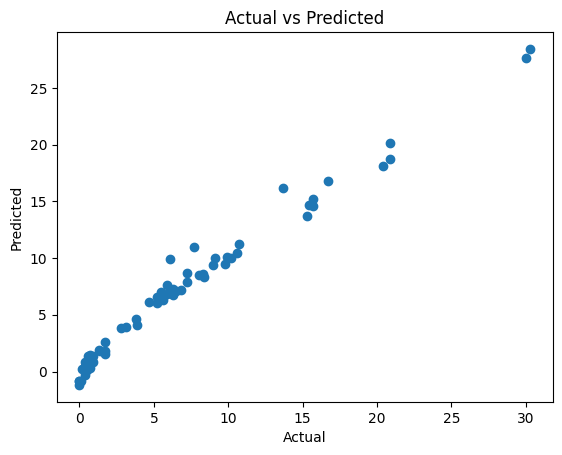

In [55]:
y_pred = ridgecv.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')

# Elasticnet Regression

Mean Absolute Error: 1.947189231119409
Mean Squared Error: 6.5045348495484046
Root Mean Squared Error: 2.5503989588980787
R-squared: 0.869746487869117


Text(0.5, 1.0, 'Actual vs Predicted')

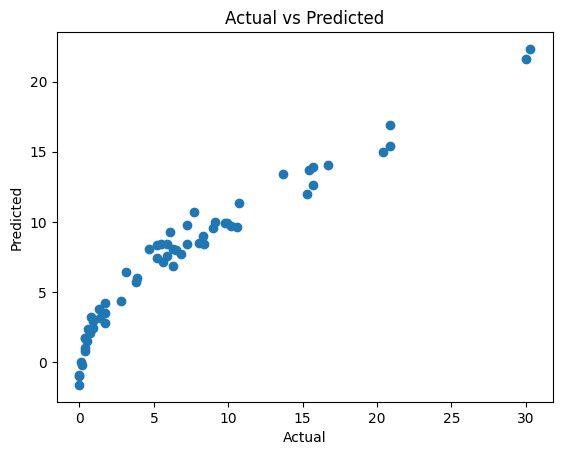

In [43]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
elasticnetreg = ElasticNet()
elasticnetreg.fit(X_train_scaled,y_train)
y_pred = elasticnetreg.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')

In [56]:
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
elasticnetcv = ElasticNetCV(cv=5)
elasticnetcv.fit(X_train_scaled,y_train)

ElasticNetCV(cv=5)

Mean Absolute Error: 0.7408269273315554
Mean Squared Error: 1.0368335884722875
Root Mean Squared Error: 1.0182502582726347
R-squared: 0.9792373752285826


Text(0.5, 1.0, 'Actual vs Predicted')

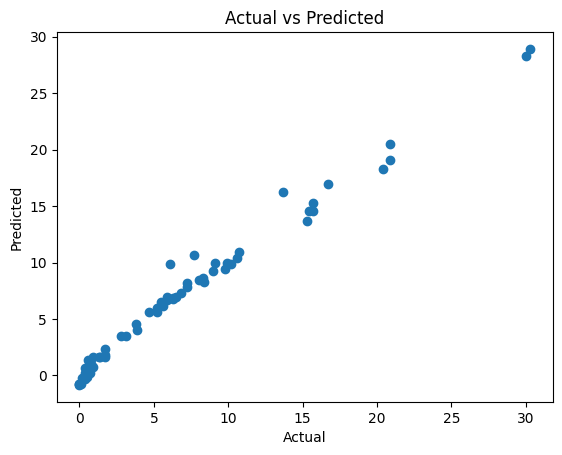

In [57]:
y_pred = elasticnetcv.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')



---

